# Задача

## Решение с SVM

### Import libraries

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns; 
sns.set()

### Load dataset

In [2]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Donald Rumsfeld' 'George W Bush' 'Gerhard Schroeder' 'Junichiro Koizumi'
 'Tony Blair']
(947, 62, 47)


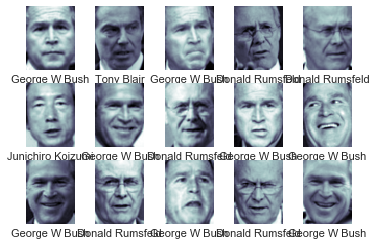

In [3]:
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

In [5]:
faces

{'data': array([[ 79.333336,  75.666664,  95.      , ...,  26.666666,  28.      ,
          37.      ],
        [ 74.333336,  71.      ,  87.      , ...,  21.333334,  22.666666,
          26.      ],
        [ 96.333336, 104.666664, 118.333336, ...,   8.666667,  11.      ,
          13.333333],
        ...,
        [139.      , 148.33333 , 156.33333 , ...,  49.      ,  19.333334,
          12.      ],
        [126.666664, 118.666664, 133.      , ...,  68.333336,  64.666664,
          56.      ],
        [ 65.333336,  86.      , 105.666664, ..., 179.      ,  93.333336,
          10.333333]], dtype=float32),
 'images': array([[[ 79.333336 ,  75.666664 ,  95.       , ...,  76.       ,
           64.333336 ,  69.666664 ],
         [ 90.666664 ,  87.333336 , 112.666664 , ...,  89.       ,
           70.666664 ,  64.333336 ],
         [ 99.666664 , 102.       , 128.66667  , ...,  97.       ,
           77.333336 ,  65.       ],
         ...,
         [220.33333  , 225.33333  , 226.66667  , .

### Make SVM classifier without PCA

In [6]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [7]:
X = faces.data
Y = faces.target

#### Split data

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3)

In [9]:
def SVClassifier(c = 1E6):
    model = SVC(C = c, kernel = 'rbf')
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [10]:
print("Accuracy: {}".format(SVClassifier()))

Accuracy: 0.5894736842105263


#### Get best C coefficient

In [11]:
# stupid method to selection coefficient C
# max_accuracy = 0.0
# best_c = 0
# for c in np.arange(1, 1E6, 10):
#     if max_accuracy < SVClassifier(c):
#         max_accuracy = SVClassifier(c)
#         best_c = c


# print("Max accuracy: {}, best c param: {}".format(max_accuracy, best_c))    

#### Tuning parametrs by GridSearchCV

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report

In [13]:
skv = StratifiedKFold(n_splits = 4, random_state = 0)
tuning_params = [
    {
        "kernel" : ['rbf', 'linear'],
        "C" : [0.1, 0.5, 1, 5, 100, 1000],
        "gamma" : [0.01, 0.1, 0.5]
    }
]

clf_grd = GridSearchCV(estimator = SVC(), param_grid = tuning_params, cv = skv)

In [14]:
clf_grd.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=0, shuffle=False),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'kernel': ['rbf', 'linear'], 'C': [0.1, 0.5, 1, 5, 100, 1000], 'gamma': [0.01, 0.1, 0.5]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

#### Get best parametrs for SVC

In [15]:
clf_grd.best_estimator_

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

#### Build model with SVC tunning

In [16]:
model = SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

# Train data
model.fit(X_train, y_train)

pred = model.predict(X_test)
print("Accurary: {}".format(model.score(X_test, y_test)))

Accurary: 0.8807017543859649


#### Report predicted data

In [17]:
print("Report", classification_report(y_test, pred))

Report              precision    recall  f1-score   support

          0       0.79      0.67      0.72        39
          1       0.91      0.96      0.93       168
          2       0.83      0.83      0.83        30
          3       0.84      0.84      0.84        19
          4       0.88      0.79      0.84        29

avg / total       0.88      0.88      0.88       285



### SVC with PCA modification

In [18]:
from sklearn.decomposition import RandomizedPCA
pca = RandomizedPCA(150)
pca.fit(faces.data)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)


RandomizedPCA(copy=True, iterated_power=2, n_components=150,
       random_state=None, whiten=False)

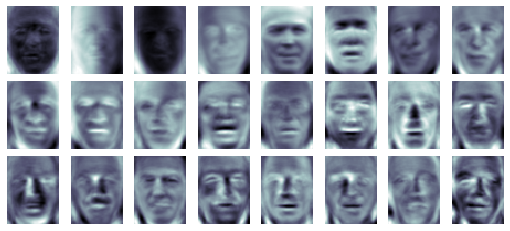

In [19]:
fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')

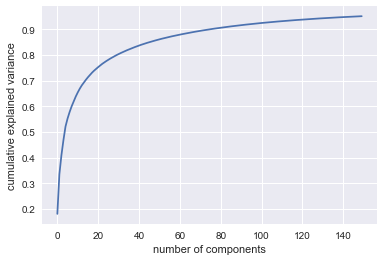

In [20]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

#### Make PCA with 150 components

In [21]:
pca = RandomizedPCA(150).fit(faces.data)
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)


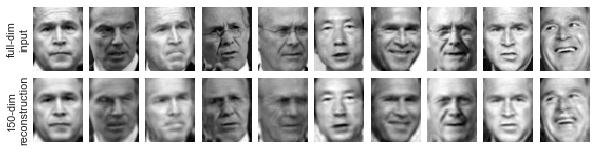

In [22]:
# Plot the results
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('150-dim\nreconstruction');

#### Split data

In [23]:
X_train, X_test, y_train, y_test = train_test_split(components, Y, test_size = 0.3)

#### Get best parametrs by GridSearchCV

In [24]:
skv = StratifiedKFold(n_splits = 3, random_state = 0)
tuning_params = [
    {
        "kernel" : ['rbf', 'linear', 'sigmoid'],
        "C" : [0.1, 0.5, 1, 5, 100, 1000],
        "gamma" : [0.01, 0.1, 0.5, 0.001, 0.0001]
    }
]

clf_grd = GridSearchCV(estimator = SVC(), param_grid = tuning_params, cv = skv)

In [25]:
clf_grd.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=0, shuffle=False),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'kernel': ['rbf', 'linear', 'sigmoid'], 'C': [0.1, 0.5, 1, 5, 100, 1000], 'gamma': [0.01, 0.1, 0.5, 0.001, 0.0001]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [26]:
clf_grd.best_estimator_

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

#### Build model fit

In [27]:
model = SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

model.fit(X_train, y_train)
pred = model.predict(X_test)
print("Accurary: {}".format(model.score(X_test, y_test)))

Accurary: 0.8070175438596491


#### Report predicted data

In [28]:
print("Report", classification_report(y_test, pred))

Report              precision    recall  f1-score   support

          0       0.75      0.71      0.73        38
          1       0.83      0.92      0.87       153
          2       0.82      0.66      0.73        35
          3       0.83      0.88      0.86        17
          4       0.71      0.60      0.65        42

avg / total       0.80      0.81      0.80       285



#### Make PCA with 100 components

In [29]:
pca = RandomizedPCA(100).fit(faces.data)
components = pca.transform(faces.data)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)


Text(0,0.5,'150-dim\nreconstruction')

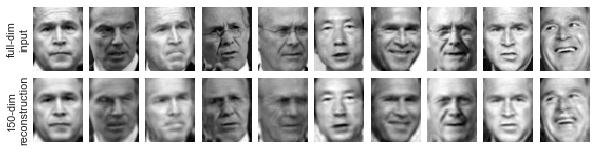

In [30]:
# Plot the results
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('150-dim\nreconstruction')

#### Split data

In [31]:
X_train, X_test, y_train, y_test = train_test_split(components, Y, test_size = 0.3)

#### Get best parametrs by GridSearchCV

In [32]:
skv = StratifiedKFold(n_splits = 4, random_state = 0)
tuning_params = [
    {
        "kernel" : ['rbf', 'linear', 'sigmoid'],
        "C" : [0.1, 0.5, 1, 5, 100, 1000],
        "gamma" : [0.01, 0.1, 0.5, 0.001, 0.0001]
    }
]

clf_grd = GridSearchCV(estimator = SVC(), param_grid = tuning_params, cv = skv)

In [33]:
clf_grd.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=0, shuffle=False),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'kernel': ['rbf', 'linear', 'sigmoid'], 'C': [0.1, 0.5, 1, 5, 100, 1000], 'gamma': [0.01, 0.1, 0.5, 0.001, 0.0001]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [34]:
clf_grd.best_estimator_

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

#### Build model SVC with best GridSearchCV params

In [35]:
model = SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

# Train 
model.fit(X_train, y_train)
pred = model.predict(X_test)
print("Accurary: {}".format(model.score(X_test, y_test)))

Accurary: 0.8421052631578947


#### Graph dependency num of comp to cum. exp. variance.

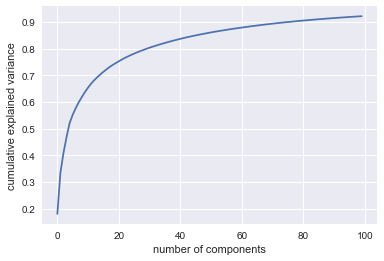

In [36]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

#### Make PCA with 200 components

In [37]:
pca = RandomizedPCA(200).fit(faces.data)
components = pca.transform(faces.data)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)


#### Split data

In [38]:
X_train, X_test, y_train, y_test = train_test_split(components, Y, test_size = 0.3)

#### Get best parametrs by GridSearchCV

In [39]:
skv = StratifiedKFold(n_splits = 4)
tuning_params = [
    {
        "kernel" : ['rbf', 'linear', 'sigmoid'],
        "C" : [0.1, 0.5, 1, 5, 100, 1000],
        "gamma" : [0.01, 0.1, 0.5, 0.05, 0.0001, 0.0005]
    }
]

clf_grd = GridSearchCV(estimator = SVC(), param_grid = tuning_params, cv = skv)

In [40]:
clf_grd.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=None, shuffle=False),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'kernel': ['rbf', 'linear', 'sigmoid'], 'C': [0.1, 0.5, 1, 5, 100, 1000], 'gamma': [0.01, 0.1, 0.5, 0.05, 0.0001, 0.0005]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [41]:
clf_grd.best_estimator_

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

#### Build model SVC with best GridSearchCV params

In [42]:
model = SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

# Train 
model.fit(X_train, y_train)
pred = model.predict(X_test)
print("Accurary: {}".format(model.score(X_test, y_test)))

Accurary: 0.8421052631578947


#### Report predicted data

In [43]:
print("Report", classification_report(y_test, pred))

Report              precision    recall  f1-score   support

          0       0.71      0.69      0.70        36
          1       0.87      0.88      0.87       154
          2       0.87      0.76      0.81        34
          3       0.85      0.94      0.89        18
          4       0.84      0.86      0.85        43

avg / total       0.84      0.84      0.84       285



## Вывод по SVC

Задача распознать лица людей по картинкам. Использовали готовый dataset, можно сказать очень чистый. Для решение задачи использовали алгоритм классификации SVC $(Support Vector Classifier)$. Получили наилучший вариант без использовании PCA для сжатия данных, но с GridSearchCV для тюнинга SVC. По данным можно судит что при больших components и больше accuracy. Можно сказать, то что, при сжатии с PCA на 150 компонентов, было максимальное accuracy ~ 85%.

Какие еще можно классификаторы использовать? Думаю KNN, xgboost, RandomForest, Decision Tree

## Решение с KNN

### Load dataset

In [44]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Donald Rumsfeld' 'George W Bush' 'Gerhard Schroeder' 'Junichiro Koizumi'
 'Tony Blair']
(947, 62, 47)


### Make KNN without PCA

In [ ]:
from sklearn. 